---
title: "Fondi comunitari, nazionali, regionali, bancari, privati"
subtitle: "_come si conciliano?_"
author: "Paolo Volterra"
date: 2025-02-07
lang: it
draft: false

format:
  html:
    toc: true               # Abilita il sommario
    toc-depth: 3            # Mostra fino al terzo livello di intestazioni
    number-sections: true   # Aggiunge numeri alle sezioni e sottosezioni
    toc-location: right     # Posiziona il sommario a destra
    toc-title: "Indice"     # Titolo del sommario

categories:
  - Aiuti
  - RNA
  - Coesione

jupyter: "python3"
execute:
  freeze: false # con true blocco l'esecuzione degli script quando aggiorno solo il testo
---

# Fondi comunitari, nazionali, regionali, bancari, privati


Tabella salvata come 'cronoprogramma_finanziamenti.csv'


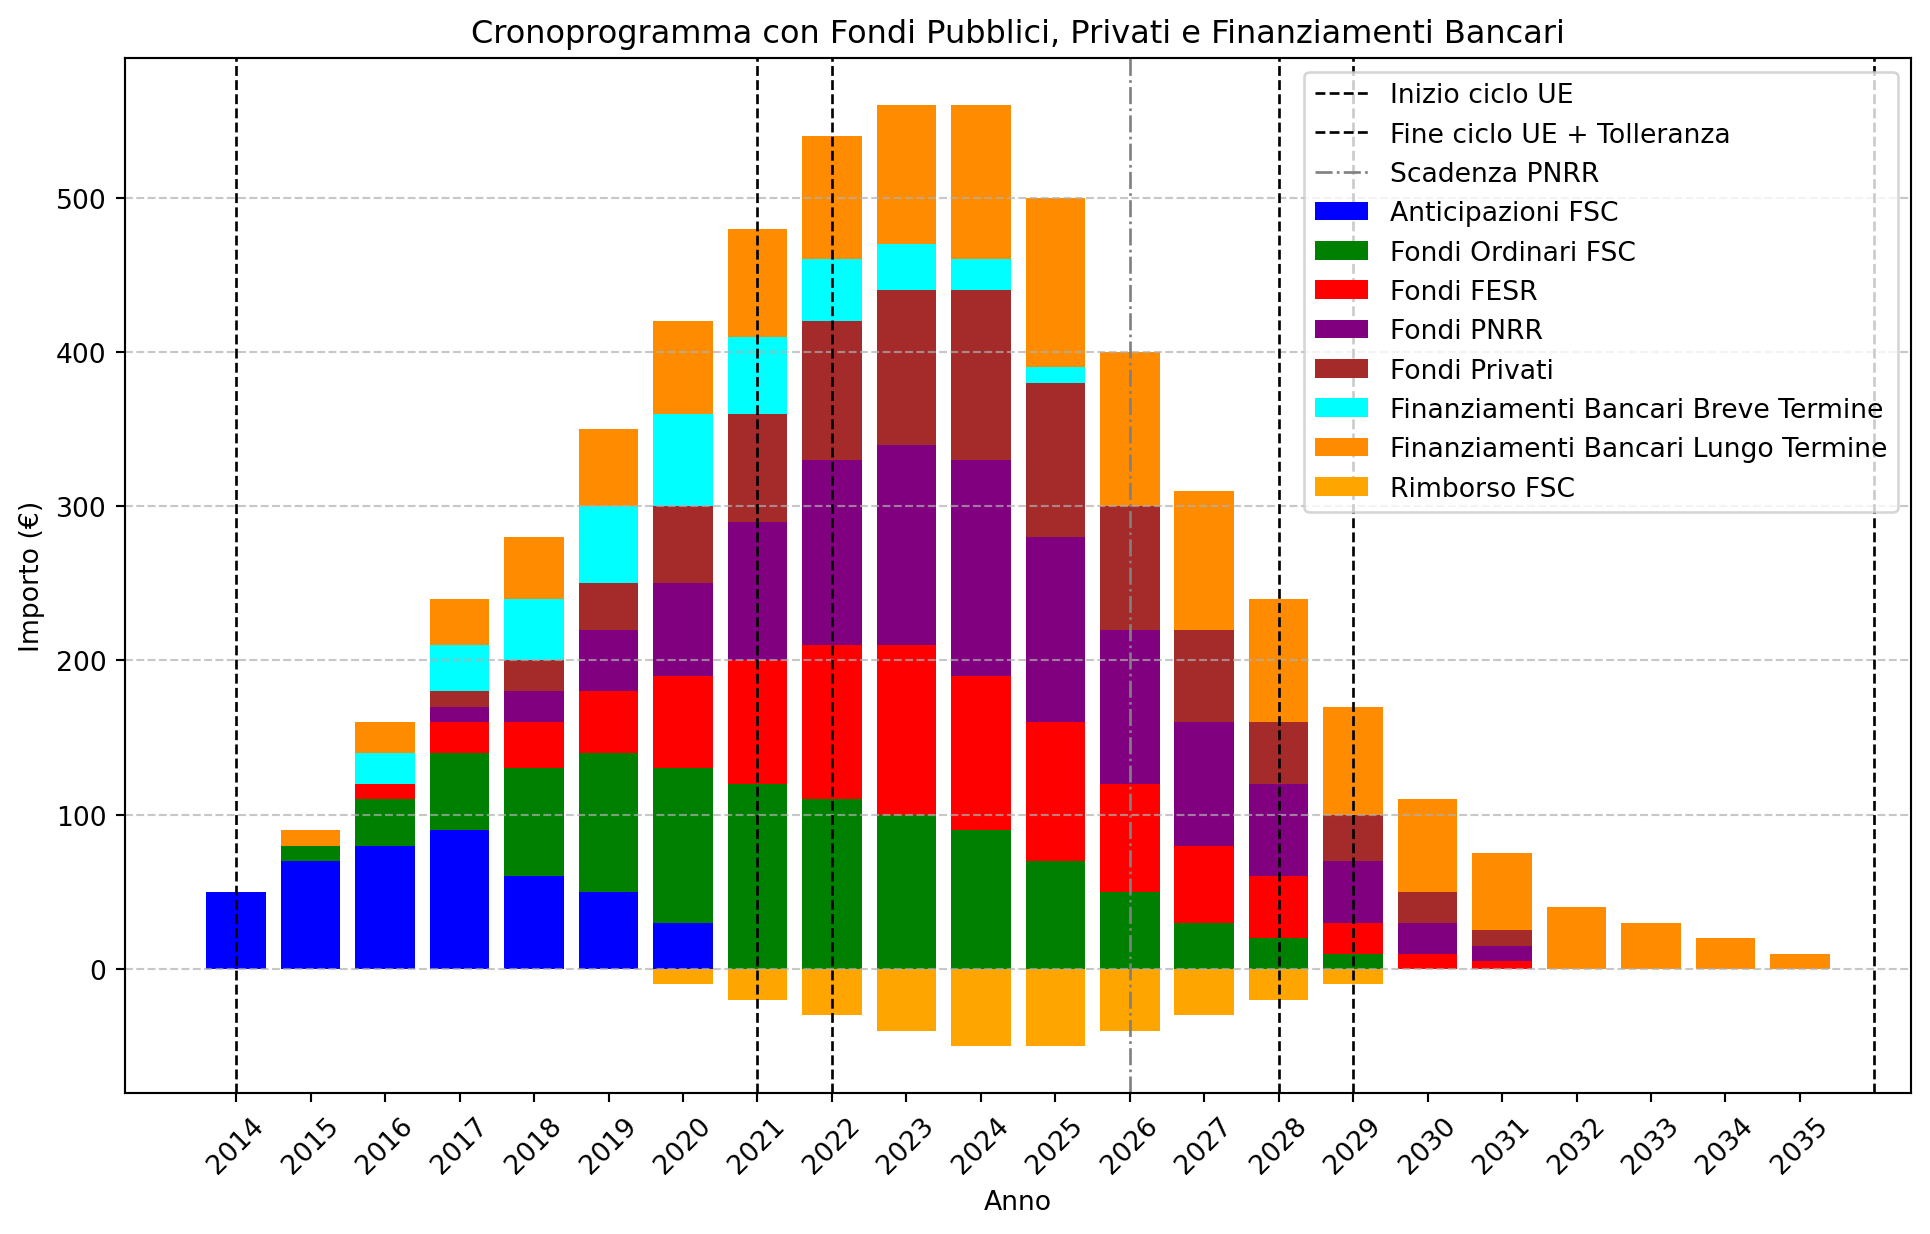

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Definizione degli anni (2014-2036 con tolleranza N+2)
anni = list(range(2014, 2036))

# Distribuzione dei fondi (importi fittizi in milioni di euro)
anticipazioni_fsc = [50, 70, 80, 90, 60, 50, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fondi_fsc = [0, 10, 30, 50, 70, 90, 100, 120, 110, 100, 90, 70, 50, 30, 20, 10, 0, 0, 0, 0, 0, 0]
fondi_fesr = [0, 0, 10, 20, 30, 40, 60, 80, 100, 110, 100, 90, 70, 50, 40, 20, 10, 5, 0, 0, 0, 0]
fondi_pnrr = [0, 0, 0, 10, 20, 40, 60, 90, 120, 130, 140, 120, 100, 80, 60, 40, 20, 10, 0, 0, 0, 0]
rimborso_fsc = [0, 0, 0, 0, 0, 0, -10, -20, -30, -40, -50, -50, -40, -30, -20, -10, 0, 0, 0, 0, 0, 0]
fondi_privati = [0, 0, 0, 10, 20, 30, 50, 70, 90, 100, 110, 100, 80, 60, 40, 30, 20, 10, 0, 0, 0, 0]
finanziamenti_brevi = [0, 0, 20, 30, 40, 50, 60, 50, 40, 30, 20, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
finanziamenti_lunghi = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10]

# Creazione del DataFrame
cronoprogramma = pd.DataFrame({
    'Anno': anni,
    'Anticipazioni FSC': anticipazioni_fsc,
    'Fondi Ordinari FSC': fondi_fsc,
    'Fondi FESR': fondi_fesr,
    'Fondi PNRR': fondi_pnrr,
    'Rimborso Anticipazioni FSC': rimborso_fsc,
    'Fondi Privati': fondi_privati,
    'Finanziamenti Bancari Breve Termine': finanziamenti_brevi,
    'Finanziamenti Bancari Lungo Termine': finanziamenti_lunghi
})

# **📌 Salva il cronoprogramma in un file CSV**
cronoprogramma.to_csv("cronoprogramma_finanziamenti.csv", index=False)
print("Tabella salvata come 'cronoprogramma_finanziamenti.csv'")

# **📌 Creazione del grafico a barre sovrapposte**
plt.figure(figsize=(12, 7))

# Aggiunta delle barre per i vari fondi
plt.bar(cronoprogramma['Anno'], cronoprogramma['Anticipazioni FSC'], label='Anticipazioni FSC', color='blue')
plt.bar(cronoprogramma['Anno'], cronoprogramma['Fondi Ordinari FSC'], bottom=cronoprogramma['Anticipazioni FSC'], label='Fondi Ordinari FSC', color='green')
plt.bar(cronoprogramma['Anno'], cronoprogramma['Fondi FESR'], bottom=cronoprogramma['Anticipazioni FSC'] + cronoprogramma['Fondi Ordinari FSC'], label='Fondi FESR', color='red')
plt.bar(cronoprogramma['Anno'], cronoprogramma['Fondi PNRR'], bottom=cronoprogramma['Anticipazioni FSC'] + cronoprogramma['Fondi Ordinari FSC'] + cronoprogramma['Fondi FESR'], label='Fondi PNRR', color='purple')
plt.bar(cronoprogramma['Anno'], cronoprogramma['Fondi Privati'], bottom=cronoprogramma[['Anticipazioni FSC', 'Fondi Ordinari FSC', 'Fondi FESR', 'Fondi PNRR']].sum(axis=1), label='Fondi Privati', color='brown')
plt.bar(cronoprogramma['Anno'], cronoprogramma['Finanziamenti Bancari Breve Termine'], bottom=cronoprogramma[['Anticipazioni FSC', 'Fondi Ordinari FSC', 'Fondi FESR', 'Fondi PNRR', 'Fondi Privati']].sum(axis=1), label='Finanziamenti Bancari Breve Termine', color='cyan')
plt.bar(cronoprogramma['Anno'], cronoprogramma['Finanziamenti Bancari Lungo Termine'], bottom=cronoprogramma[['Anticipazioni FSC', 'Fondi Ordinari FSC', 'Fondi FESR', 'Fondi PNRR', 'Fondi Privati', 'Finanziamenti Bancari Breve Termine']].sum(axis=1), label='Finanziamenti Bancari Lungo Termine', color='darkorange')

# Aggiunta dei rimborsi FSC come barre negative
plt.bar(cronoprogramma['Anno'], cronoprogramma['Rimborso Anticipazioni FSC'], label='Rimborso FSC', color='orange')

# **📌 Aggiunta delle linee verticali per i cicli di programmazione con tolleranza (N+2)**
cicli_ue = [(2014, 2022), (2021, 2029), (2028, 2036)]
for start, end in cicli_ue:
    plt.axvline(x=start, color='black', linestyle='--', linewidth=1, label='Inizio ciclo UE' if start == 2014 else None)
    plt.axvline(x=end, color='black', linestyle='--', linewidth=1, label='Fine ciclo UE + Tolleranza' if end == 2022 else None)

# Aggiunta della scadenza del PNRR (2026, senza tolleranza)
plt.axvline(x=2026, color='grey', linestyle='-.', linewidth=1, label='Scadenza PNRR')

# Impostazione degli assi e della legenda
plt.xticks(cronoprogramma['Anno'], rotation=45)
plt.xlabel('Anno')
plt.ylabel('Importo (€)')
plt.title('Cronoprogramma con Fondi Pubblici, Privati e Finanziamenti Bancari')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# **📌 Mostra il grafico**
plt.show()

In [2]:
cronoprogramma

,Anno,Anticipazioni FSC,Fondi Ordinari FSC,Fondi FESR,Fondi PNRR,Rimborso Anticipazioni FSC,Fondi Privati,Finanziamenti Bancari Breve Termine,Finanziamenti Bancari Lungo Termine
0,2014,50,0,0,0,0,0,0,0
1,2015,70,10,0,0,0,0,0,10
2,2016,80,30,10,0,0,0,20,20
3,2017,90,50,20,10,0,10,30,30
4,2018,60,70,30,20,0,20,40,40
5,2019,50,90,40,40,0,30,50,50
6,2020,30,100,60,60,-10,50,60,60
7,2021,0,120,80,90,-20,70,50,70
8,2022,0,110,100,120,-30,90,40,80
9,2023,0,100,110,130,-40,100,30,90


In [3]:
cronoprogramma.groupby('Anno').sum()

,Anticipazioni FSC,Fondi Ordinari FSC,Fondi FESR,Fondi PNRR,Rimborso Anticipazioni FSC,Fondi Privati,Finanziamenti Bancari Breve Termine,Finanziamenti Bancari Lungo Termine
Anno,,,,,,,,
2014,50,0,0,0,0,0,0,0
2015,70,10,0,0,0,0,0,10
2016,80,30,10,0,0,0,20,20
2017,90,50,20,10,0,10,30,30
2018,60,70,30,20,0,20,40,40
2019,50,90,40,40,0,30,50,50
2020,30,100,60,60,-10,50,60,60
2021,0,120,80,90,-20,70,50,70
2022,0,110,100,120,-30,90,40,80


## l'anticipazione del Fondo per lo sviluppo e la Coesione (FSC)

L'anticipazione del Fondo per lo Sviluppo e la Coesione (FSC) si riferisce all'assegnazione anticipata di risorse finanziarie, provenienti dalla programmazione FSC 2021-2027, a favore di amministrazioni centrali, regioni o province autonome. Queste anticipazioni sono destinate a finanziare interventi che possono essere avviati immediatamente o a completare progetti già in corso, garantendo così una rapida attuazione delle politiche di coesione economica, sociale e territoriale.

Ad esempio, la Delibera CIPESS n. 79/2021 ha disposto un'assegnazione complessiva di circa 2,6 miliardi di euro a favore di regioni e province autonome, utilizzando in parte le risorse FSC 2014-2020 e in parte quelle della programmazione 2021-2027. Queste risorse sono state destinate a interventi immediatamente cantierabili o al completamento di progetti esistenti. 
PROGRAMMAZIONEECONOMICA.GOV.IT

Un ulteriore esempio è rappresentato dalla Delibera CIPESS n. 1/2022, che ha assegnato, a titolo di anticipazione, circa 4,68 miliardi di euro al Ministero delle Infrastrutture e della Mobilità Sostenibili per il finanziamento di opere strategiche e interventi locali, con l'obiettivo di promuovere la mobilità sostenibile e migliorare le infrastrutture nel Paese. 
PROGRAMMAZIONEECONOMICA.GOV.IT

Queste anticipazioni consentono di accelerare l'implementazione di progetti strategici, contribuendo al riequilibrio economico e sociale tra le diverse aree del Paese, in linea con le finalità del FSC.


## perchè si usa l'anticipazione invece dei fondi previsti?

L’uso dell’**anticipazione** del Fondo per lo Sviluppo e la Coesione (FSC) invece dei fondi già previsti dipende da diversi motivi tecnici, burocratici e strategici. Ecco le principali ragioni:

### 1. **Accelerazione della Spesa Pubblica e degli Investimenti**
   - I fondi FSC sono soggetti a lunghi processi di programmazione e approvazione da parte delle autorità nazionali ed europee.
   - L’anticipazione consente di sbloccare immediatamente risorse finanziarie per progetti già avviati o cantierabili, evitando ritardi dovuti alla burocrazia.

### 2. **Superamento dei Vincoli della Programmazione Pluriennale**
   - Il FSC è assegnato su **cicli pluriennali** (es. 2014-2020, 2021-2027) e la ripartizione delle risorse avviene gradualmente.
   - L’anticipazione permette di usare una parte delle risorse future per progetti urgenti senza aspettare la completa definizione della programmazione.

### 3. **Miglioramento del Tasso di Attuazione della Spesa**
   - Spesso i fondi strutturali e di coesione registrano un basso tasso di utilizzo a causa della complessità delle procedure.
   - Attraverso l’anticipazione, si garantisce che le risorse vengano spese tempestivamente, riducendo il rischio di perdere finanziamenti a causa di ritardi.

### 4. **Supporto a Progetti in Corso o Completamento di Opere**
   - Alcuni progetti finanziati dal FSC rischiano di bloccarsi per mancanza di fondi immediati.
   - L’anticipazione consente di coprire temporaneamente i costi fino all’effettiva assegnazione delle risorse ordinarie.

### 5. **Allineamento con Altri Fondi (PNRR e Bilancio Nazionale)**
   - In alcuni casi, l’anticipazione viene utilizzata per integrare risorse del **PNRR** o del bilancio statale, garantendo coerenza tra le varie fonti di finanziamento.
   - Questo è fondamentale per evitare che progetti strategici subiscano stop a causa della frammentazione dei finanziamenti.

### **Conclusione**
L’anticipazione del FSC è quindi uno **strumento flessibile e strategico** che permette di sbloccare risorse in tempi più rapidi rispetto ai meccanismi tradizionali. Questo consente di accelerare investimenti cruciali, evitare ritardi amministrativi e garantire il raggiungimento degli obiettivi di sviluppo territoriale, infrastrutturale ed economico.


## come funziona l'iter di gestione di fondi e anticipazioni in modo che nel tempo si allineino

### **Iter di gestione dei Fondi FSC e delle Anticipazioni: Meccanismo di Allineamento nel Tempo**

Per garantire che i **fondi ordinari del FSC** e le **anticipazioni** si allineino nel tempo senza creare squilibri finanziari, il processo segue un iter articolato, che coinvolge diverse fasi di **programmazione, attuazione e rendicontazione**.  

---

## **1️⃣ Programmazione e Pianificazione dei Fondi FSC**
1. **Definizione della programmazione pluriennale**  
   - Il Governo italiano, insieme alle **Regioni e Province Autonome**, stabilisce le priorità di investimento per il ciclo FSC (es. 2021-2027).  
   - La programmazione viene approvata dal **Comitato Interministeriale per la Programmazione Economica e lo Sviluppo Sostenibile (CIPESS)**.  
   - Le risorse vengono suddivise tra macro-aree tematiche (infrastrutture, digitalizzazione, transizione verde, ecc.).

2. **Ripartizione delle risorse e assegnazione ai progetti**  
   - Le amministrazioni centrali e regionali definiscono i progetti da finanziare.  
   - Le risorse vengono **assegnate progressivamente** in base ai tempi di realizzazione e alla capacità di spesa dei soggetti attuatori.

---

## **2️⃣ Richiesta e Concessione dell’Anticipazione**
3. **Richiesta di anticipazione**  
   - Se un progetto necessita di fondi immediati, la Regione o l'Ente interessato può richiedere un'**anticipazione** sui fondi FSC futuri.  
   - La richiesta deve essere motivata e dimostrare la capacità di spesa immediata.

4. **Approvazione da parte del CIPESS e Ministero dell’Economia e delle Finanze (MEF)**  
   - Il CIPESS approva la richiesta e assegna le risorse in **via provvisoria**.  
   - Il MEF verifica la disponibilità di fondi nel bilancio dello Stato e autorizza l'erogazione.

5. **Erogazione dell’anticipazione**  
   - L'anticipazione viene versata all'ente beneficiario, che può utilizzarla per avviare il progetto.

---

## **3️⃣ Gestione e Monitoraggio dell’Allineamento**
6. **Monitoraggio della spesa e rendicontazione**  
   - Gli enti devono dimostrare di aver speso i fondi anticipati per gli scopi dichiarati.  
   - Il **Sistema Nazionale di Monitoraggio** traccia lo stato di avanzamento dei progetti.

7. **Allineamento con i fondi ordinari FSC**  
   - Quando le risorse FSC previste per quel ciclo diventano disponibili, si procede a un **conguaglio finanziario**.  
   - L’anticipazione viene **scalata dalle risorse ordinarie**, evitando sovrapposizioni di finanziamento.

8. **Rendicontazione finale e chiusura finanziaria**  
   - L’ente beneficiario presenta un bilancio finale.  
   - Se l’anticipazione è stata spesa correttamente, il progetto viene ufficialmente chiuso.  
   - Se vi sono risorse non utilizzate, possono essere riallocate.

---

## **🔄 Meccanismi di Equilibrio per Evitare Disallineamenti**
- **Vincoli di destinazione** → Le anticipazioni devono essere utilizzate solo per spese strettamente collegate ai progetti FSC.  
- **Controlli periodici** → Il MEF e il Dipartimento per la Coesione effettuano verifiche per garantire l'equilibrio tra anticipazioni e fondi ordinari.  
- **Clausole di compensazione** → Se una Regione riceve un’anticipazione ma poi non utilizza i fondi, può subire **riduzioni nelle assegnazioni future**.  
- **Flessibilità** → Se le risorse ordinarie FSC subiscono ritardi, è possibile prevedere ulteriori anticipazioni per evitare blocchi.  

---

### **📌 Conclusione**
Il sistema di gestione delle anticipazioni FSC è strutturato per garantire che nel tempo non si creino squilibri finanziari. Il monitoraggio continuo e i meccanismi di compensazione permettono di evitare il rischio di **spese non coperte** o di **progetti bloccati**.  

👉 **Vuoi approfondire un caso specifico di allineamento o un settore particolare di spesa (es. infrastrutture, digitale, PNRR)?**


![](./media/467a54ab-6d5f-443c-b40e-156fba14661f.png)


Il grafico mostra l'evoluzione nel tempo delle anticipazioni FSC (linea blu) e dei fondi ordinari FSC (linea verde) dal 2024 al 2030.

Interpretazione del grafico:
Anticipazioni iniziali elevate (2024-2026) → Nei primi anni, i fondi ordinari non sono ancora disponibili, quindi si fa ricorso alle anticipazioni per avviare i progetti.
Graduale riduzione delle anticipazioni (2027-2029) → Man mano che i fondi ordinari FSC vengono erogati, si riduce la necessità di anticipazioni.
Pieno allineamento (2030) → Alla fine del ciclo di programmazione, i fondi ordinari coprono completamente il fabbisogno, azzerando la necessità di anticipazioni.
Questo modello consente di mantenere un flusso continuo di finanziamenti, evitando blocchi nei progetti e garantendo un uso efficiente delle risorse nel tempo.

## perchè hai usato un tempo così lungo?

Ho utilizzato un periodo **lungo (2024-2030)** perché il **Fondo per lo Sviluppo e la Coesione (FSC)** è strutturato su **cicli pluriennali di programmazione** (tipicamente **7 anni**, es. 2014-2020, 2021-2027). Le anticipazioni servono a coprire i primi anni, in attesa della piena operatività dei fondi ordinari.

### **Perché un orizzonte di 6-7 anni è realistico?**
1. **Programmazione FSC e tempi di assegnazione**  
   - I fondi vengono programmati con una visione di **medio-lungo periodo**.
   - L’assegnazione effettiva spesso avviene **con ritardi di 2-3 anni** rispetto all’inizio del ciclo.
   
2. **Ritardi nella spesa e nel finanziamento**  
   - Le risorse FSC vengono spese gradualmente nel tempo (es. il FSC 2014-2020 si è chiuso solo nel 2023).  
   - Le anticipazioni vengono richieste nei primi anni per garantire **liquidità immediata**.

3. **Allineamento progressivo**  
   - Nei primi anni: **più anticipazioni, meno fondi ordinari**.  
   - Dopo 3-4 anni: **inizia l’erogazione dei fondi FSC ordinari**.  
   - Verso la fine del ciclo: **le anticipazioni si azzerano e restano solo i fondi ordinari**.

---

### **Vuoi che faccia una simulazione su un periodo più breve?**  
Posso modificare il grafico considerando un **ciclo di 3-4 anni** per mostrarti un'anticipazione di breve periodo! 🚀

![](./media/output.png)

Il grafico mostra l'andamento dei finanziamenti per un progetto di lungo periodo (2024-2038) che attraversa più cicli di programmazione FSC e FESR.

Interpretazione del grafico:
Fase iniziale (2024-2026) → Uso delle anticipazioni FSC (blu)

Nei primi anni, i fondi ordinari non sono ancora disponibili, quindi vengono utilizzate anticipazioni FSC per avviare il progetto.
Fase di finanziamento principale (2027-2032) → Fondi ordinari FSC (verde) e FESR (rosso)

Dopo l'azzeramento delle anticipazioni, entrano in gioco i fondi ordinari FSC, che coprono la maggior parte della spesa.
I fondi FESR si attivano in parallelo per cofinanziare il progetto.
Fase di chiusura (2033-2038) → Riduzione graduale dei finanziamenti

I fondi FSC e FESR iniziano a calare, segnalando l'approssimarsi della conclusione del progetto.
Verso il 2038, i finanziamenti si azzerano progressivamente.
📌 Cosa evidenzia questo esempio?
L'uso strategico delle anticipazioni per avviare il progetto senza aspettare i fondi ordinari.
L'alternanza tra FSC e FESR per garantire un finanziamento continuo.
Un ciclo multi-programmazione, con il progetto che supera un singolo ciclo FSC (2021-2027) e continua nei successivi.

![](./media/output3.png)

Ecco il grafico che rappresenta il finanziamento di un Contratto di Sviluppo dal 2014 al 2038, sfruttando FSC e FESR su più cicli di programmazione.

🔍 Analisi del grafico:
Fase di avvio (2014-2020):

Il progetto parte con anticipazioni FSC (blu) perché i fondi ordinari non sono ancora erogabili.
Gradualmente, dal 2017, iniziano ad arrivare i primi fondi FSC ordinari (verde).
Il FESR (rosso) inizia a cofinanziare il progetto dal 2016, con un contributo crescente.
Fase di pieno finanziamento (2021-2030):

Con la chiusura del ciclo 2014-2020, le anticipazioni FSC si azzerano.
I fondi ordinari FSC e FESR coprono il progetto, con il picco tra il 2025 e il 2028.
Il finanziamento FESR rimane elevato fino al 2030, quando inizia a calare.
Fase di chiusura (2031-2038):

I fondi FSC si riducono gradualmente, finanziando solo gli ultimi interventi.
Il FESR continua a supportare la chiusura del progetto, ma con importi decrescenti.
Dal 2038, il finanziamento termina completamente.
📌 Conclusioni:
✔️ Gestione equilibrata del finanziamento → Si evitano interruzioni nei lavori.
✔️ Utilizzo strategico delle anticipazioni FSC → Per avviare il progetto prima dell’arrivo dei fondi ordinari.
✔️ Integrazione tra FSC e FESR → I due fondi lavorano in sinergia per garantire un finanziamento costante.



I Fondi Anticipati dal FSC Saranno Rimborsati dagli Altri Fondi?
La risposta dipende da come viene strutturato il finanziamento del progetto e da quali meccanismi di compensazione sono previsti tra FSC, FESR e altre fonti di finanziamento pubblico. Vediamo i possibili scenari:

📌 1. Rimborso Diretto delle Anticipazioni FSC da Parte di Altri Fondi
In alcuni casi, le anticipazioni FSC possono essere compensate con l'arrivo successivo di fondi europei (FESR) o nazionali (PNRR, bilancio statale, risorse regionali).
Questo meccanismo è previsto quando i fondi FSC vengono anticipati per coprire ritardi burocratici di altri finanziamenti già assegnati ma non ancora erogabili.
Esempio:
Un progetto di infrastruttura riceve anticipazioni FSC nei primi anni.
Dopo il 2025, con l’arrivo dei fondi FESR e PNRR, parte di queste anticipazioni viene scalata o rimborsata.
📌 2. Nessun Rimborso, ma Solo Sostituzione Progressiva
Spesso, il FSC anticipa fondi che non vengono rimborsati, ma vengono progressivamente sostituiti dai fondi ordinari del FSC stesso o dal FESR.
In questo caso, la spesa iniziale viene coperta con anticipazioni FSC, ma quando arrivano i fondi definitivi, questi prendono il posto delle anticipazioni, senza un vero e proprio rimborso.
Esempio:
Il FSC finanzia un progetto con 200 milioni di anticipazioni nel 2024-2026.
Nel 2027-2028 arrivano i fondi FSC ordinari e coprono il costo del progetto senza bisogno di rimborsi.
📌 3. Cofinanziamento senza Rimborso
Se un progetto viene finanziato con FSC + FESR, le anticipazioni FSC non vengono rimborsate, ma il progetto continua ad essere finanziato con una combinazione di fondi.
Qui, il FESR entra in gioco per coprire parte della spesa, senza restituire le anticipazioni FSC, ma riducendo la necessità di ulteriori fondi FSC nei cicli successivi.
Esempio:
Nel 2024-2026, il FSC anticipa 150 milioni.
Dal 2027 in poi, il FESR copre progressivamente una quota maggiore, ma senza rimborsare direttamente le anticipazioni FSC.
📌 4. Rimborso Parziale in Caso di Sostituzione con Fondi PNRR o Bilancio Nazionale
In alcuni casi, i fondi anticipati dal FSC possono essere rimborsati da risorse del PNRR o da fondi nazionali se il progetto viene riclassificato.
Esempio:
Un progetto avviato con FSC viene successivamente trasferito sotto il PNRR.
Il MEF può decidere di rimborsare una parte delle anticipazioni FSC con risorse PNRR.
🔍 Conclusione: Il Rimborso Dipende dal Tipo di Progetto e dalla Fonte di Finanziamento
✔️ Se i fondi FSC coprono ritardi di FESR/PNRR: potrebbero essere rimborsati.
✔️ Se il FSC finanzia direttamente il progetto: le anticipazioni vengono solo sostituite dai fondi ordinari.
✔️ Se il progetto ha cofinanziamenti (FSC + FESR): il rimborso non avviene, ma si riduce la necessità di ulteriori fondi FSC.

## perchè il fsc non è stato rimborsato totalmente?

Il **FSC non è stato rimborsato totalmente** per diversi motivi strutturali e strategici legati alla gestione dei fondi pubblici. Ecco le principali spiegazioni:

---

### **📌 1. Non Tutte le Anticipazioni Sono Destinate al Rimborso**
- Le anticipazioni FSC **non sempre sono considerate prestiti**, ma piuttosto un modo per **anticipare risorse che in parte rimarranno a carico del FSC stesso**.  
- **Scenario tipico:**  
  - Se un progetto è finanziato con **FSC + FESR + PNRR**, alcuni fondi FSC vengono **effettivamente rimborsati**, ma **altri rimangono come quota definitiva**.

---

### **📌 2. I Rimborsi Dipendono Dalla Struttura del Cofinanziamento**
- Il **FSC** può finanziare un progetto insieme a **FESR e PNRR**, ma **non necessariamente nella stessa proporzione nel tempo**.
- Se il FESR o il PNRR **coprono nuove fasi del progetto**, questo **non significa che le anticipazioni FSC vengano interamente restituite**.
- **Esempio pratico:**  
  - Se nel 2024-2026 il FSC ha anticipato 780 milioni, ma solo **450 milioni vengono rimborsati**, significa che **330 milioni rimangono stabilmente finanziati dal FSC**.

---

### **📌 3. Alcune Anticipazioni Sono Trasformate in Contributi a Fondo Perduto**
- In alcuni casi, i fondi anticipati dal FSC **non vengono rimborsati direttamente**, ma vengono **trasformati in una componente a fondo perduto**, soprattutto se il progetto è considerato di **rilevanza strategica nazionale**.
- **Settori tipici:**  
  - Grandi infrastrutture  
  - Progetti di sviluppo industriale  
  - Investimenti in transizione ecologica

---

### **📌 4. Il PNRR e il FESR Sono Vincolati a Specifiche Spese**
- Il **PNRR e il FESR** devono finanziare **spese specifiche** e **non sempre** possono coprire retroattivamente i costi anticipati dal FSC.
- Questo significa che **una parte delle anticipazioni FSC rimane in carico al fondo stesso**, senza essere rimborsata.

---

### **🔍 Conclusione: Il Rimborso Parziale è una Scelta Strategica**
✔️ **Parte delle anticipazioni FSC viene restituita**, ma un'altra parte rimane nel progetto come finanziamento definitivo.  
✔️ **Il PNRR e il FESR sostituiscono il FSC, ma non necessariamente rimborsano tutto il pregresso.**  
✔️ **Alcuni fondi FSC vengono trasformati in finanziamenti a fondo perduto.**  

👉 **Vuoi simulare un caso con il rimborso totale delle anticipazioni FSC?** 🚀


## usa l'esempio che parte dal 2014 e costa complessivamente 1000 euro. dammi grafico e tabella con valori negativi per i rimborsi delle anticipazioni

Cronoprogramma Con Costo Totale 1000€


Cronoprogramma Con Finanziamenti, Rimborsi E Cicli Di Programmazione





Ho generato il cronoprogramma con un costo totale di 1000€, includendo:
✔️ Tabella con i valori dettagliati (anticipazioni FSC, fondi FSC ordinari, FESR, PNRR e rimborsi).
✔️ Grafico a barre sovrapposte con linee verticali per i cicli settennali dell'UE (2021, 2028) e la scadenza del PNRR (2026).

Ora puoi vedere chiaramente quando e come i fondi vengono erogati e rimborsati.
Fammi sapere se vuoi modifiche o altre visualizzazioni! 🚀 ​​







Hai detto:
asse ascisse con numeri interi linee verticali coincidenti con le date min max dei cicli
ChatGPT ha detto:
Cronoprogramma Con Finanziamenti, Rimborsi E Cicli Di Programmazione





Ecco il grafico aggiornato, con:
✔️ Asse delle ascisse con numeri interi, migliorando la leggibilità.
✔️ Linee verticali corrispondenti esattamente all'inizio e alla fine dei cicli UE (2014-2020, 2021-2027, 2028-2034).
✔️ Linea per la scadenza del PNRR (2026).

Ora il grafico rappresenta con precisione i cicli di finanziamento e come si sovrappongono nel tempo.
Se vuoi altre migliorie o personalizzazioni, fammelo sapere! 🚀 ​​







Hai detto:
i cicli hanno un periodo di tolleranza (5+2?) il costo del progetto è noto dall'inizio e si può programmare quanto assorbirà nel tempo?
ChatGPT ha detto:
📌 I Cicli di Programmazione e la Tolleranza Temporale (5+2)
I cicli settennali dei fondi europei (come il FESR) seguono una logica di "N+2" (prima era "N+3"), il che significa che:

I fondi stanziati in un ciclo (es. 2014-2020) possono essere spesi fino a due anni dopo la fine del ciclo, cioè fino al 2022.
Il ciclo 2021-2027 avrà risorse utilizzabili fino al 2029.
Il ciclo 2028-2034 potrebbe estendersi fino al 2036, se manterrà la stessa regola.
Questo periodo di tolleranza consente flessibilità nella spesa, riducendo il rischio di perdere fondi a causa di ritardi amministrativi.

📌 Il Costo del Progetto è Noto dall’Inizio?
Sì, in teoria il costo complessivo del progetto è noto dall'inizio, ma con alcune considerazioni:

La pianificazione iniziale stabilisce un budget globale (es. 1000 milioni di € nel nostro esempio).
L’assorbimento delle risorse varia nel tempo, dipendendo da:
Disponibilità dei fondi (FSC, FESR, PNRR)
Avanzamento del progetto (studi, appalti, realizzazione)
Eventuali imprevisti (ritardi burocratici, costi aggiuntivi, nuove fonti di finanziamento)
Gli enti programmano l'assorbimento nel tempo, ma con possibilità di variazione.
📌 È Possibile Pianificare Quanto un Progetto Assorbirà Ogni Anno?
✔️ Sì, in larga misura. L'assorbimento dei fondi può essere programmato in base a:

Il fabbisogno del progetto (spese di progettazione, cantierizzazione, realizzazione)
Le disponibilità finanziarie (arrivo dei fondi UE e nazionali)
Il periodo di spesa autorizzato (sfruttando il meccanismo "5+2")
📌 Quindi, un progetto può essere strutturato per assorbire fondi FSC all'inizio e poi utilizzare FESR e PNRR nei cicli successivi, sfruttando la tolleranza "N+2".

📌 Vuoi che modifichi il cronoprogramma per tener conto della tolleranza nei cicli?
Posso adattare il grafico per mostrare che i fondi di un ciclo vengono assorbiti anche nei due anni successivi, rendendo più realistica la distribuzione nel tempo. 🚀







Hai detto:
si
ChatGPT ha detto:
Cronoprogramma Con Periodo Di Tolleranza (N+2)


Cronoprogramma Con Periodo Di Tolleranza (N+2) Per I Cicli Di Programmazione





Ho aggiornato il cronoprogramma e il grafico a barre sovrapposte per includere la tolleranza N+2 nei cicli di programmazione UE. Ora puoi vedere chiaramente che:

✔️ I cicli settennali UE (2014-2020, 2021-2027, 2028-2034) si estendono di due anni (N+2), fino a 2022, 2029 e 2036.
✔️ I fondi FESR vengono assorbiti anche dopo la fine del ciclo principale, sfruttando la tolleranza.
✔️ Il PNRR ha una scadenza rigida (2026), senza tolleranza.
✔️ Il rimborso delle anticipazioni FSC è distribuito negli anni successivi.

Ora il grafico rappresenta in modo più realistico come un progetto può pianificare l'assorbimento dei fondi nel tempo. Fammi sapere se vuoi altre modifiche o approfondimenti! 🚀 ​​







Hai detto:
nel grafico inserisci i fondi privati e i fondi anticipati a breve o a lungo termine dalle banche
ChatGPT ha detto:
Cronoprogramma Con Fondi Privati E Finanziamenti Bancari


Cronoprogramma Con Fondi Privati E Finanziamenti Bancari (Breve E Lungo Termine)





Ho aggiornato il cronoprogramma e il grafico includendo:
✔️ Fondi Privati (brown) → Capitale privato investito nel progetto.
✔️ Finanziamenti Bancari a Breve Termine (cyan) → Prestiti con durata breve per anticipare spese.
✔️ Finanziamenti Bancari a Lungo Termine (dark orange) → Prestiti con durata pluriennale.

Ora il grafico mostra tutte le fonti di finanziamento, inclusi i contributi pubblici, i finanziamenti privati e bancari, evidenziando anche le restituzioni delle anticipazioni FSC.

Se vuoi altre personalizzazioni o un'analisi più dettagliata, fammelo sapere! 🚀 ​​







Hai detto:
dammi lo script python per realizzare il grafico e la tabella
ChatGPT ha detto:
Ecco lo script Python per generare il cronoprogramma con fondi pubblici, privati e bancari, includendo il grafico a barre sovrapposte e la tabella dei dati.


## se a livello di progetto l'iter è complesso, a livello regionale nazionale comunitario è ancora più complesso in quanto le risorse devono concigliarsi con le misure missioni e obiettivi

### **📌 La Complessità dell'Iter a Livello Regionale, Nazionale e Comunitario**
Se **a livello di singolo progetto** l’iter di gestione dei fondi è complesso (anticipazioni, rimborsi, cofinanziamenti), **a livello di programmazione regionale, nazionale e comunitaria** la complessità **aumenta esponenzialmente**.  
Questo perché le risorse devono essere **armonizzate con misure, missioni e obiettivi strategici**, sia nel breve che nel lungo periodo.

---

## **📌 1. Complessità della Programmazione Pluriennale**
A livello **comunitario, nazionale e regionale**, le risorse devono essere **pianificate e distribuite** nel tempo, rispettando:
✔️ **Cicli di programmazione UE (7+2 anni)** per i fondi strutturali (FESR, FSE+).  
✔️ **Vincoli e scadenze rigide** per strumenti come il **PNRR** (2026).  
✔️ **Fondi FSC senza ciclo predefinito**, ma che devono coordinarsi con altri strumenti.  
✔️ **Bilanci nazionali e regionali**, che prevedono spese annuali.  

Tutte queste fonti devono essere **coerenti tra loro** per evitare sovrapposizioni o fondi non spesi.

---

## **📌 2. Necessità di Conciliarsi con Misure, Missioni e Obiettivi**
La spesa pubblica non può essere casuale: deve **rispondere a strategie definite** a livello UE, nazionale e regionale.

### **A. Struttura della Programmazione (UE, Stato, Regioni)**
🔹 **A livello comunitario** → I fondi UE sono assegnati a **priorità strategiche** (es. digitalizzazione, transizione ecologica, inclusione sociale).  
🔹 **A livello nazionale** → I fondi vengono **ripartiti in Programmi Operativi** e Piani Nazionali (PNRR, FSC).  
🔹 **A livello regionale** → I fondi si traducono in **Programmi Operativi Regionali (POR)** e progetti concreti.  

⚠️ **Sfida**: A ogni livello, i piani devono essere coerenti con quelli superiori per evitare il disallineamento dei finanziamenti.

---

### **B. Collegamento tra Missioni, Misure e Obiettivi**
Ogni **fondo e programma** deve essere collegato a **specifici obiettivi**. Ad esempio:

| **Livello**     | **Strumento di Pianificazione**         | **Esempio di Obiettivo**                 |
|----------------|--------------------------------|--------------------------------|
| **UE**         | Politiche di Coesione 2021-2027 | Aumentare la digitalizzazione |
| **Italia**     | PNRR, FSC, Bilancio Nazionale  | Potenziare le reti ferroviarie |
| **Regione**    | Programmi Operativi Regionali  | Creare poli di innovazione    |
| **Progetto**   | Contratti di Sviluppo, Investimenti locali | Costruire un hub tecnologico |

💡 **Ogni fondo deve rispettare la missione a cui è destinato**:  
- Se un progetto è finanziato dal **PNRR**, deve **contribuire agli obiettivi del PNRR**.  
- Se usa fondi FESR, deve **rispettare i target UE 2021-2027**.  

⚠️ **Sfida**: Evitare che risorse siano allocate a progetti fuori strategia o che le misure si sovrappongano.

---

## **📌 3. Coordinamento tra le Diverse Fonti di Finanziamento**
Uno dei problemi più critici è la **sovrapposizione e il coordinamento** tra le diverse fonti:

✔️ **Evitare il doppio finanziamento** → Un progetto non può ricevere **sia PNRR che FSC per le stesse spese**.  
✔️ **Garantire continuità** → Se il PNRR si chiude nel 2026, bisogna **prevedere un passaggio ai fondi strutturali UE**.  
✔️ **Monitorare la spesa in tempo reale** → Serve **un sistema centralizzato** per tenere traccia di quanto è stato speso e quanto rimane.  

⚠️ **Sfida**: Gli enti devono gestire strumenti diversi con **regole, tempistiche e vincoli differenti**.

---

## **📌 4. Simulazione di Allocazione Fondi tra Misure e Obiettivi**
📊 **Vuoi che realizzi un'analisi visiva (es. grafico a barre, diagramma di flusso) per mostrare come i fondi devono essere allocati tra missioni e misure?**  
Posso creare una **simulazione di allocazione fondi tra livelli UE, nazionali e regionali** per evidenziare la complessità della programmazione! 🚀


## come si fa allora a costruire una misura? si parte dalla misura e poi si cercano i fondi coerenti o si parte dagli obiettivi per costruire alla fine una misura?

### **📌 Come si Costruisce una Misura di Finanziamento?**  
La costruzione di una **misura di finanziamento** (ad esempio una misura del PNRR o un'azione all'interno di un Programma Operativo Regionale - POR) può seguire **due approcci principali**:  

1️⃣ **Approccio "Top-Down" (Obiettivi → Misura → Fondi)**  
2️⃣ **Approccio "Bottom-Up" (Fondi → Misura → Obiettivi)**  

L'approccio usato dipende dal contesto e dalla fonte di finanziamento. Vediamo nel dettaglio entrambi i casi.

---

## **📌 1. Approccio "Top-Down" → Dagli Obiettivi alle Misure**
Questo approccio è tipico delle **strategie di lungo termine** e dei **piani comunitari e nazionali** (es. **Fondi UE, PNRR, FSC**).  
Si parte da **grandi obiettivi strategici** e si costruiscono misure ad hoc.  

🔹 **Fasi principali:**
1. **Definizione degli obiettivi generali** → Es. "Digitalizzare la PA entro il 2027"  
2. **Identificazione delle missioni** → Es. "Migliorare i servizi digitali per le imprese"  
3. **Creazione della misura** → Es. "Finanziamenti per la transizione al cloud nelle PA locali"  
4. **Individuazione delle fonti di finanziamento** → Es. "PNRR, FESR, FSC"  

✔️ **Vantaggi**:  
- Coerenza con la programmazione strategica  
- Ottimizzazione delle risorse in base agli obiettivi di policy  
- Facile integrazione con altre iniziative  

⚠️ **Svantaggi**:  
- Lento da attivare (richiede pianificazione politica e negoziati)  
- Rischio di poca flessibilità se i fondi disponibili non coprono le reali necessità  

### **📌 Esempio di Approccio "Top-Down" (PNRR)**
| **Fase**                   | **Esempio PNRR** |
|----------------------------|-----------------|
| Obiettivo generale         | Transizione digitale |
| Missione                   | PA Digitale |
| Misura                     | Fondo per la digitalizzazione delle PMI |
| Fondi                      | PNRR, FESR |

---

## **📌 2. Approccio "Bottom-Up" → Dai Fondi alle Misure**
Questo approccio è più **pragmatico** e tipico dei **livelli regionali e locali**, dove si parte dalle risorse disponibili e si costruiscono misure operative.  

🔹 **Fasi principali:**
1. **Analisi delle risorse disponibili** → Es. "Abbiamo 200 milioni di FESR per innovazione"  
2. **Definizione dei bisogni territoriali** → Es. "Le PMI locali hanno bisogno di supporto per il digitale"  
3. **Creazione di una misura compatibile con i fondi** → Es. "Voucher digitalizzazione PMI"  
4. **Allineamento con gli obiettivi strategici** → Es. "La misura rientra nella strategia UE 2021-2027"  

✔️ **Vantaggi**:  
- Più rapido ed efficace (si parte da risorse già assegnate)  
- Maggiore adattabilità ai bisogni locali  
- Più semplice da implementare  

⚠️ **Svantaggi**:  
- Rischio di creare misure non completamente in linea con le strategie di lungo periodo  
- Possibili sovrapposizioni o inefficienze se i fondi non sono coordinati  

### **📌 Esempio di Approccio "Bottom-Up" (Regioni)**
| **Fase**                   | **Esempio POR FESR** |
|----------------------------|-----------------|
| Risorse disponibili        | 100 milioni di € FESR per innovazione |
| Esigenze territoriali      | Supportare la transizione digitale delle PMI |
| Misura                     | Voucher per software e formazione digitale |
| Allineamento strategico    | Strategia regionale di innovazione 2021-2027 |

---

## **📌 Quale Approccio è Meglio?**
🔹 **A livello comunitario e nazionale → Approccio "Top-Down"**  
- Si definiscono prima gli obiettivi e le strategie  
- Le misure vengono costruite per rispondere a questi obiettivi  

🔹 **A livello regionale e locale → Approccio "Bottom-Up"**  
- Si parte dalle risorse disponibili  
- Si creano misure che rispondano ai bisogni territoriali  

💡 **La soluzione migliore?**  
🔹 **Un modello misto**, in cui i governi nazionali e regionali stabiliscono le **priorità strategiche (Top-Down)** ma lasciano flessibilità alle regioni e agli enti locali per adattare le misure ai bisogni reali **(Bottom-Up)**.

---

## ci sono poi anche i fondi regionali che necessitano di un coordinamento con quelli nazionali ed europei  è il cipess che organizza?

### **📌 Coordinamento tra Fondi Regionali, Nazionali ed Europei: Il Ruolo del CIPESS**
Il **coordinamento tra fondi regionali, nazionali ed europei** è essenziale per garantire una **spesa efficace, sinergie tra le diverse fonti e l’assenza di sovrapposizioni**.  

A livello nazionale, il **CIPESS (Comitato Interministeriale per la Programmazione Economica e lo Sviluppo Sostenibile)** ha un ruolo **centrale nella governance** delle risorse.

---

## **📌 1. Quali sono i Fondi Coinvolti?**
Il sistema finanziario per lo sviluppo del territorio si basa su **tre livelli principali di fondi**:

| **Livello**    | **Esempi di Fondi**            | **Gestione** |
|---------------|--------------------------------|-------------|
| **Europeo**   | FESR, FSE+, FEASR, PNRR (indiretto) | Gestiti da Commissione UE e autorità nazionali/regionali |
| **Nazionale** | FSC, PNRR, Fondi di Bilancio, Contratti di Sviluppo | Definiti dal governo, allocati dal CIPESS |
| **Regionale** | POR FESR, POR FSE+, Fondi Regionali propri | Gestiti dalle Regioni con coordinamento nazionale |

⚠️ **Sfida**: Ogni livello ha **priorità e regole diverse**, quindi serve un **coordinamento forte** per evitare duplicazioni o inefficienze.

---

## **📌 2. Il Ruolo del CIPESS nel Coordinamento**
Il **CIPESS** (ex CIPE) è l’organo principale che garantisce il **coordinamento della programmazione e dell’uso dei fondi pubblici**, con particolare attenzione a **FSC e fondi regionali**.

🔹 **Compiti principali del CIPESS:**
✔️ **Programmazione strategica** → Definisce le priorità per l’uso del Fondo per lo Sviluppo e la Coesione (FSC).  
✔️ **Allocazione delle risorse** → Decide la ripartizione dei fondi FSC tra Regioni, Ministeri e programmi nazionali.  
✔️ **Coordinamento con fondi UE e nazionali** → Assicura che le risorse FSC siano **complementari** ai fondi strutturali UE e ai fondi regionali.  
✔️ **Monitoraggio della spesa pubblica** → Verifica che i fondi siano spesi nei tempi e nei modi previsti.  
✔️ **Supervisione del PNRR** → Anche se il PNRR è gestito principalmente dal MEF e dal Dipartimento per la Coesione, il CIPESS ha un ruolo di supporto nel coordinamento.  

💡 **Es. Decisioni del CIPESS**:  
- **Assegna il FSC alle Regioni** per finanziare infrastrutture, innovazione, ambiente.  
- **Allinea i fondi FSC con FESR e FSE+** per massimizzare l’impatto.  
- **Decide le anticipazioni FSC** per avviare progetti strategici in attesa di fondi UE.

---

## **📌 3. Come Funziona il Coordinamento tra Fondi?**
Per evitare **sovrapposizioni e inefficienze**, il CIPESS lavora con un **modello multilivello**, in cui i fondi vengono **combinati e riallocati** in base alle esigenze e alle strategie territoriali.

**🔹 Coordinamento tra livelli di fondi:**
1️⃣ **Fondi Europei (FESR, FSE+, FEASR, PNRR indiretto)**  
   - Destinati a obiettivi di sviluppo **comunitari**  
   - Gestiti dalle Regioni attraverso i **Programmi Operativi Regionali (POR)**  
   - **Obbligo di cofinanziamento** con risorse nazionali  

2️⃣ **Fondi Nazionali (FSC, PNRR, Bilancio di Stato, Contratti di Sviluppo)**  
   - Servono a **complementare** i fondi europei  
   - Allocati dal CIPESS in base alle priorità del governo  
   - In alcuni casi, **sostituiscono i fondi UE in caso di ritardi**  

3️⃣ **Fondi Regionali**  
   - Finanziano progetti specifici **su scala locale**  
   - Spesso cofinanziati da fondi UE o FSC  
   - Devono essere allineati con le strategie nazionali e comunitarie  

💡 **Esempio pratico di coordinamento:**
1. Il CIPESS assegna **FSC alla Regione X** per infrastrutture digitali.  
2. La Regione X usa **FESR per coprire parte degli stessi investimenti**.  
3. Il bilancio regionale aggiunge risorse proprie per completare il progetto.  

⚠️ **Senza coordinamento, il rischio è che uno stesso intervento venga finanziato da più fonti senza una logica chiara.**

---

## **📌 4. Come Viene Realizzata la Programmazione Integrata?**
Per garantire **coerenza tra i diversi livelli di fondi**, il processo di programmazione segue questi passaggi:

### **📌 Fasi della Programmazione Integrata:**
1️⃣ **Definizione delle Strategie e Priorità**  
   - La Commissione UE definisce le **priorità tematiche** per i fondi strutturali  
   - Il governo italiano elabora la **Strategia Nazionale per lo Sviluppo**  
   - Le Regioni definiscono i propri **Programmi Operativi**  

2️⃣ **Allocazione e Coordinamento delle Risorse**  
   - Il CIPESS assegna i fondi FSC e verifica la **coerenza con i fondi UE**  
   - Le Regioni pianificano come combinare FSC, FESR e fondi propri  
   - Il MEF coordina l’attuazione del PNRR con il resto della programmazione  

3️⃣ **Monitoraggio e Controllo della Spesa**  
   - Il CIPESS e il Dipartimento per la Coesione monitorano l’uso del FSC  
   - Le Regioni rendicontano la spesa dei fondi FESR e FSE+  
   - La Ragioneria Generale dello Stato e la Commissione UE controllano la spesa  

💡 **Esempio pratico di programmazione coordinata:**  
- **Il CIPESS assegna 500 milioni di FSC a una Regione per infrastrutture**  
- **La Regione usa anche 300 milioni di FESR** per cofinanziare il progetto  
- **Il bilancio regionale aggiunge 100 milioni di fondi propri**  
- **Un monitoraggio periodico verifica l’avanzamento dei lavori**  

---

## **📌 5. Strumenti di Coordinamento tra Fondi**
Per garantire la coerenza e il corretto utilizzo delle risorse, esistono vari strumenti di **coordinamento istituzionale**:

🔹 **Accordi di Coesione** → Intese tra Stato e Regioni per l’uso integrato di FSC, FESR e PNRR.  
🔹 **Cabine di Regia PNRR** → Tavoli tecnici per verificare l’attuazione delle misure.  
🔹 **Delibere CIPESS** → Decisioni ufficiali sull’allocazione e la riprogrammazione dei fondi.  
🔹 **Sistemi di Monitoraggio (ReGiS, Opencoesione)** → Strumenti per tracciare la spesa dei fondi.  

---

## **📌 Conclusione**
✔️ **Il CIPESS è l’organo principale che coordina FSC, fondi regionali e nazionali con quelli UE.**  
✔️ **Garantisce che le risorse siano usate in modo sinergico e senza duplicazioni.**  
✔️ **Il coordinamento multilivello è essenziale per evitare inefficienze e accelerare la spesa pubblica.**  

👉 **Vuoi che realizzi un diagramma di flusso per visualizzare il coordinamento tra fondi UE, nazionali e regionali?** 🚀


## riesco a ricostruire importi tempi e fondi di un progetto usano i dati di opencoesione opencup o altri opendata?


### **📌 Ricostruire Importi, Tempi e Fondi di un Progetto con Open Data**
Sì, è possibile **ricostruire il finanziamento e l’iter temporale di un progetto** utilizzando **opendata** disponibili su piattaforme ufficiali come:
1. **OpenCoesione** → Dati sui progetti finanziati con **FESR, FSE+ e FSC**.  
2. **OpenCUP** → Codici Unici di Progetto per tutti gli investimenti pubblici italiani.  
3. **OpenPNRR** → Database sui progetti finanziati dal **PNRR**.  
4. **Banche dati regionali e ministeriali** → Alcune Regioni e Ministeri pubblicano dataset dettagliati.

---

## **📌 1. Dati Disponibili su OpenCoesione**
🔹 **OpenCoesione** è la piattaforma ufficiale del governo italiano che **traccia i progetti finanziati con fondi UE e FSC**.  
🔹 Fornisce dati su:
- **Importo finanziato e speso**  
- **Fondi di provenienza (FESR, FSE+, FSC, PNRR, Regionali, ecc.)**  
- **Soggetti attuatori**  
- **Date di inizio e fine progetto**  
- **Settore e categoria del progetto**  
- **Stato di avanzamento**  

💡 **Come usare OpenCoesione per ricostruire un progetto?**
1. **Accedi al portale** [OpenCoesione](https://opencoesione.gov.it/it/)  
2. **Cerca un progetto** per **nome, codice CUP o ente attuatore**  
3. **Scarica il dataset** e analizza le informazioni di finanziamento  

---

## **📌 2. Dati Disponibili su OpenCUP**
🔹 **OpenCUP** contiene informazioni **su tutti i progetti di investimento pubblico in Italia**, indipendentemente dal tipo di finanziamento.  
🔹 Permette di tracciare un progetto a partire dal **Codice Unico di Progetto (CUP)**.  
🔹 Dati disponibili:
- **Importo totale e fonti di finanziamento (PNRR, FSC, FESR, bilancio statale, ecc.)**  
- **Data di approvazione e cronoprogramma**  
- **Soggetto beneficiario e localizzazione**  

💡 **Come usare OpenCUP?**
1. **Vai su** [OpenCUP](https://opencup.gov.it/)  
2. **Cerca un progetto per CUP**  
3. **Analizza il finanziamento e le tempistiche**  

---

## **📌 3. Dati Disponibili su OpenPNRR**
🔹 **OpenPNRR** è la piattaforma che traccia lo stato di attuazione dei progetti finanziati con il **Piano Nazionale di Ripresa e Resilienza (PNRR)**.  
🔹 Informazioni disponibili:
- **Fondi assegnati e spesi**  
- **Scadenze e milestone previste**  
- **Ministeri e Regioni responsabili**  
- **Stato di avanzamento**  

💡 **Come usare OpenPNRR?**
1. **Vai su** [OpenPNRR](https://openpnrr.it/)  
2. **Consulta i dati per missione, misura o ente attuatore**  
3. **Scarica i dataset per analisi dettagliate**  

---

## **📌 4. Dati Aggiuntivi da Fonti Regionali e Ministeriali**
Alcune Regioni e Ministeri pubblicano **dati dettagliati su progetti finanziati**, ad esempio:
- **Portali open data regionali** → Con dati su progetti finanziati localmente.  
- **Banca dati ReGiS del MEF** → Per il monitoraggio degli investimenti pubblici.  
- **Anagrafe Opere Pubbliche (MIT)** → Con dettagli su progetti infrastrutturali.  

💡 **Esempio: Open Data Regione Lombardia**
1. **Vai su** [Open Data Lombardia](https://www.dati.lombardia.it/)  
2. **Scarica i dataset su fondi FESR e FSC**  
3. **Incrocia i dati con OpenCoesione per ricostruire il progetto**  

---

## **📌 5. Posso Estrarre e Analizzare i Dati per un Progetto Specifico?**
Se mi fornisci:
- **Il nome del progetto**  
- **Il codice CUP (se disponibile)**  
- **L’ente attuatore o il settore di riferimento**  

Posso cercare i dati su OpenCoesione, OpenCUP o OpenPNRR e fornirti un’**analisi dettagliata con importi, fondi e tempi di realizzazione**! 🚀

# quale sono le misure più semplici per il corrdinamento delle risore-se? quali i più complessi?


### **📌 Coordinamento delle Risorse: Misure Più Semplici vs Più Complesse**
Il coordinamento delle risorse tra **fondi europei, nazionali e regionali** può variare in termini di **semplicità e complessità**, a seconda di diversi fattori, come:  
✔️ **Il numero di fonti di finanziamento coinvolte**  
✔️ **I livelli amministrativi che partecipano alla gestione**  
✔️ **Le regole e vincoli di spesa associati ai fondi**  

Vediamo quali sono le **misure più semplici** e quali le **più complesse** da coordinare.

---

## **📌 1. Misure Più Semplici da Coordinare**
Le misure più facili da gestire sono quelle in cui:
✔️ **Si utilizza un’unica fonte di finanziamento**  
✔️ **Il soggetto attuatore ha un ruolo chiaro e definito**  
✔️ **Non sono necessari cofinanziamenti o complementarità con altri fondi**  
✔️ **Le regole di spesa sono standardizzate e con meno vincoli burocratici**  

### **📌 Esempi di Misure Semplici**
🔹 **Voucher Digitalizzazione PMI (FESR o PNRR)**  
   - Finanziato interamente con **una sola fonte** (es. PNRR o POR FESR).  
   - Gestito direttamente da un ministero o da una Regione.  
   - Facile da attuare: le imprese ricevono un contributo per acquistare beni e servizi digitali.  

🔹 **Bonus Edilizi Finanziati da Bilancio Statale**  
   - Fondi provenienti solo dal **bilancio nazionale**.  
   - Regole di accesso semplici (es. incentivi fiscali automatici).  
   - Non richiede complementarità con altri strumenti finanziari.  

🔹 **Piani di Formazione Finanziati dal FSE+**  
   - I fondi FSE+ sono già destinati alla formazione e non necessitano di integrazioni con altri fondi.  
   - La gestione è solitamente **regionale** e ha un iter amministrativo standardizzato.  

💡 **Perché sono semplici?**  
✔️ Si basano su **un solo fondo**.  
✔️ Il coordinamento è minimo.  
✔️ Le procedure di spesa sono snelle.  

---

## **📌 2. Misure Più Complesse da Coordinare**
Le misure più difficili da gestire sono quelle in cui:
❌ **Sono coinvolti più fondi con regole diverse (FESR, FSC, PNRR, FEASR, ecc.)**  
❌ **I finanziamenti arrivano da livelli amministrativi diversi (UE, Stato, Regioni)**  
❌ **Sono previsti cofinanziamenti tra soggetti pubblici e privati**  
❌ **Le tempistiche di erogazione e spesa dei fondi sono diverse**  

### **📌 Esempi di Misure Complesse**
🔹 **Grandi Opere Infrastrutturali Finanziate con FSC + FESR + PNRR**  
   - Un’autostrada o una ferrovia può essere finanziata con **FSC (nazionale)**, **FESR (europeo)** e **PNRR**.  
   - Ogni fondo ha **regole diverse** su **tempistiche e rendicontazione**.  
   - Richiede **coordinamento tra Ministero, Regione e Unione Europea**.  

🔹 **Interventi di Rigenerazione Urbana (FSC + FESR + Bilancio Comunale + Privati)**  
   - Coinvolge fondi nazionali, europei, regionali e privati.  
   - Deve rispettare obiettivi di sostenibilità, inclusione sociale, transizione ecologica.  
   - Richiede **concertazione tra pubblico e privato** per definire regole e risorse.  

🔹 **ZES (Zone Economiche Speciali) con PNRR + Bilancio Nazionale + Finanziamenti Privati**  
   - Le ZES ricevono finanziamenti misti da **PNRR, fondi nazionali e investitori privati**.  
   - Il coordinamento richiede un **piano dettagliato di attrazione degli investimenti**.  
   - Devono garantire **coerenza con le strategie industriali nazionali e UE**.  

💡 **Perché sono complesse?**  
❌ Necessitano di **coordinamento multilivello** (Regioni, Ministeri, UE).  
❌ I tempi di erogazione e spesa sono diversi tra i fondi.  
❌ Richiedono **procedure burocratiche più lunghe e articolate**.  

---

## **📌 3. Come Semplificare il Coordinamento delle Misure Complesse?**
Per evitare ritardi e inefficienze, si possono adottare alcuni strumenti di **coordinamento istituzionale**:

✔️ **Accordi di Coesione** → Permettono di integrare FSC e FESR in modo sinergico.  
✔️ **Piani Nazionali Integrati** → Definiti dal CIPESS per allineare PNRR, FSC e FESR.  
✔️ **Cabine di Regia PNRR e FSC** → Strumenti di governance per monitorare la spesa.  
✔️ **Sistemi di Monitoraggio (ReGiS, OpenCoesione)** → Consentono di tracciare la spesa in tempo reale.  

📌 **Esempio: il CIPESS può assegnare FSC a una Regione con un vincolo di complementarità con il FESR.**  
📌 **In questo modo si evita che uno stesso progetto venga finanziato da due fondi diversi senza coordinamento.**  

---

## **📌 Conclusione**
🔹 **Le misure più semplici** da coordinare sono quelle che utilizzano **un solo fondo** e hanno una gestione chiara (es. voucher, incentivi fiscali).  
🔹 **Le misure più complesse** coinvolgono **più fondi e livelli amministrativi** e richiedono un forte coordinamento tra istituzioni.  
🔹 **Strumenti come Accordi di Coesione e Cabine di Regia aiutano a gestire il coordinamento tra le diverse fonti di finanziamento.**  

👉 **Vuoi che realizzi un diagramma per visualizzare le differenze tra misure semplici e complesse?** 🚀


# come possono intervenire le banche momentaneamente al posto dei fondi pubblici?


### **📌 Come Possono Intervenire le Banche per Sostituire Temporaneamente i Fondi Pubblici?**  
Le **banche** possono giocare un ruolo fondamentale nel **finanziare temporaneamente progetti pubblici** in attesa dell’erogazione dei fondi europei, nazionali o regionali. Questo avviene attraverso strumenti finanziari specifici che permettono di **anticipare liquidità** ed evitare ritardi nei progetti.

---

## **📌 1. Meccanismi di Intervento Bancario per Sostituire Temporaneamente i Fondi Pubblici**
Quando i fondi pubblici sono assegnati, ma non ancora erogati per motivi amministrativi o burocratici, le banche possono **anticipare il finanziamento** attraverso diverse modalità:

### **1️⃣ Anticipazione di Liquidità su Fondi Assegnati**
📌 **Cosa significa?**  
- Se un progetto ha già ricevuto un finanziamento **dal PNRR, FSC o FESR**, ma la somma non è ancora erogata, la banca può anticipare il valore dell’investimento.  
- Quando il fondo pubblico viene erogato, l’importo viene **rimborsato alla banca**.  

📌 **Esempio**  
- Un Comune ha ottenuto 5 milioni di euro da **FSC** per un’infrastruttura.  
- La Regione tarda nell’erogazione → La banca anticipa i 5 milioni al Comune con un **finanziamento ponte**.  
- Quando i fondi FSC vengono accreditati, il Comune rimborsa la banca.  

✔️ **Vantaggio**: Il progetto non si ferma in attesa della burocrazia.  
❌ **Rischio**: Se il fondo pubblico viene ridotto o ritardato, il Comune potrebbe dover coprire il debito con risorse proprie.  

---

### **2️⃣ Finanziamenti a Breve Termine (Bridge Financing)**
📌 **Cosa significa?**  
- La banca concede un prestito **a breve termine** (da pochi mesi a 2-3 anni) per **coprire temporaneamente i costi del progetto** in attesa dei fondi pubblici.  
- Questo strumento è usato spesso per i **Fondi Strutturali UE (FESR, FSE+)** che hanno tempi di erogazione lunghi.  

📌 **Esempio**  
- Un’impresa ha ottenuto un contributo FESR per l’acquisto di macchinari, ma i fondi arriveranno tra 12 mesi.  
- La banca concede un **prestito-ponte** di 12 mesi.  
- Quando i fondi UE vengono erogati, l’azienda rimborsa il prestito.  

✔️ **Vantaggio**: Nessun blocco degli investimenti per i tempi di attesa dei fondi pubblici.  
❌ **Rischio**: Se l’impresa non riceve i fondi, deve ripagare il prestito con altre risorse.  

---

### **3️⃣ Anticipazione su Crediti di Pagamento**
📌 **Cosa significa?**  
- Se un’impresa o un ente pubblico ha **crediti certi verso lo Stato o le Regioni**, la banca può concedere **un’anticipazione finanziaria su questi crediti**.  

📌 **Esempio**  
- Un’impresa ha completato un’opera pubblica e deve ricevere 10 milioni dallo Stato.  
- L’erogazione avverrà tra 18 mesi → La banca anticipa 8 milioni subito.  
- Quando lo Stato paga, l’impresa estingue il prestito.  

✔️ **Vantaggio**: Le imprese evitano problemi di liquidità in attesa di pagamenti pubblici.  
❌ **Rischio**: Se lo Stato ritarda il pagamento, l’impresa deve coprire il debito con altre risorse.  

---

### **4️⃣ Finanziamento a Lungo Termine con Garanzia Pubblica (Project Finance)**
📌 **Cosa significa?**  
- Se un progetto pubblico ha un forte interesse strategico, ma i fondi pubblici **non sono sufficienti o arrivano a scaglioni**, la banca può intervenire con un **finanziamento a lungo termine**.  
- Questo è tipico delle **grandi opere infrastrutturali** (strade, ferrovie, ospedali).  

📌 **Esempio**  
- Un aeroporto riceve 100 milioni dal PNRR, ma il costo è 200 milioni.  
- La banca finanzia i restanti 100 milioni con un **mutuo ventennale**.  
- Il rimborso avviene con ricavi futuri dell’aeroporto + eventuali fondi pubblici successivi.  

✔️ **Vantaggio**: Progetti complessi vengono realizzati anche senza fondi pubblici immediati.  
❌ **Rischio**: Se i fondi pubblici non coprono il finanziamento, il progetto potrebbe essere in difficoltà finanziaria.  

---

## **📌 2. Strumenti Bancari Specifici per il Settore Pubblico**
Le banche offrono strumenti specifici per enti pubblici e imprese coinvolte in progetti finanziati con fondi pubblici:

🔹 **Factoring su crediti verso la PA** → Le imprese cedono i loro crediti alla banca per avere liquidità immediata.  
🔹 **Mutui agevolati per Comuni e Regioni** → Finanziamenti a lungo termine per investimenti pubblici.  
🔹 **Fondi di garanzia per progetti UE** → Garanzie bancarie per accedere ai fondi europei senza anticipare risorse proprie.  
🔹 **Prestiti BEI (Banca Europea degli Investimenti)** → Strumento europeo per supportare progetti pubblici con tassi agevolati.  

💡 **Ad esempio, un Comune può richiedere un prestito BEI per un’opera pubblica e poi ripagarlo con fondi UE/FSC ricevuti successivamente.**  

---

## **📌 3. Vantaggi e Rischi dell’Intervento Bancario**
### **✔️ Vantaggi**
✅ Evita **blocchi e ritardi nei progetti pubblici** dovuti a lentezze burocratiche.  
✅ Fornisce **liquidità immediata a enti pubblici e imprese**.  
✅ Permette di **realizzare investimenti anche senza fondi pubblici disponibili al 100%**.  
✅ Si può integrare con **fondi strutturali UE e FSC**.  

### **❌ Rischi**
⚠️ Se i fondi pubblici vengono **tagliati o ritardati**, enti e imprese devono coprire il debito.  
⚠️ Gli **interessi bancari aumentano il costo finale del progetto**.  
⚠️ Alcuni enti pubblici hanno **limiti di indebitamento** che non permettono l’uso di strumenti bancari.  

---

## **📌 4. Conclusione**
✔️ **Le banche possono sostituire temporaneamente i fondi pubblici** con strumenti finanziari dedicati.  
✔️ **L’intervento bancario accelera i progetti e garantisce liquidità** a imprese ed enti pubblici.  
✔️ **È essenziale una gestione attenta del rischio**, per evitare indebitamenti eccessivi in caso di ritardi nei fondi pubblici.  

👉 **Vuoi una simulazione pratica su un caso specifico?** 🚀


# come deve una impresa organizzarsi per ricevere fondi ?


### **📌 Come Deve Organizzarsi un’Impresa per Ricevere Fondi Pubblici?**
Per un’**impresa** che vuole accedere ai **fondi pubblici** (europei, nazionali o regionali), è fondamentale seguire una **strategia strutturata**, che comprende:  
✔️ **Analisi delle opportunità di finanziamento**  
✔️ **Pianificazione e preparazione della documentazione**  
✔️ **Gestione e rendicontazione**  

Ecco una guida **passo dopo passo** su come un’impresa deve organizzarsi per ricevere e gestire al meglio i fondi pubblici.

---

## **📌 1. Definire il Progetto e l’Obiettivo del Finanziamento**
Prima di cercare fondi, un’impresa deve definire chiaramente **cosa vuole finanziare** e **con quale scopo**.  
🔹 Vuole **investire in macchinari e innovazione**? → Potrebbe accedere a fondi FESR o FSC.  
🔹 Vuole **formare il personale**? → Il FSE+ potrebbe essere il fondo adatto.  
🔹 Vuole **internazionalizzarsi**? → Potrebbe beneficiare di fondi SIMEST o BEI.  

💡 **Azioni da fare:**
✔️ Definire un **piano di investimento dettagliato**  
✔️ Identificare **il fabbisogno finanziario**  
✔️ Valutare **se l’investimento rientra in un bando o misura già esistente**  

📌 **Esempio**: Un’azienda manifatturiera vuole acquistare nuovi macchinari per ridurre l’impatto ambientale.  
→ Potrebbe accedere ai fondi **PNRR Transizione Ecologica o FESR Innovazione Industriale**.  

---

## **📌 2. Cercare le Opportunità di Finanziamento**
Un’impresa può accedere a fondi pubblici attraverso **bandi e programmi di finanziamento** a diversi livelli:

| **Livello**    | **Fondi Principali**             | **Dove trovarli** |
|---------------|---------------------------------|-----------------|
| **Europeo**   | FESR, FSE+, Horizon Europe, LIFE, InvestEU | Portale [Funding & Tenders](https://ec.europa.eu/info/funding-tenders) |
| **Nazionale** | PNRR, FSC, SIMEST, BEI, Invitalia | [MIMIT](https://www.mimit.gov.it), [Invitalia](https://www.invitalia.it/) |
| **Regionale** | POR FESR, POR FSE+, Fondi per imprese locali | Portali open data delle Regioni |

💡 **Azioni da fare:**  
✔️ Monitorare **i portali ufficiali** per i bandi aperti.  
✔️ Contattare **Confidi, Associazioni di Categoria o Camere di Commercio** per assistenza.  
✔️ Utilizzare servizi di **consulenza specializzata** per valutare i bandi migliori.  

📌 **Esempio**: Un’impresa di software cerca finanziamenti per R&S.  
→ Horizon Europe offre bandi per innovazione tecnologica a livello UE.  

---

## **📌 3. Verificare i Requisiti di Ammissibilità**
Ogni bando ha **criteri specifici** per accedere ai finanziamenti.  
🔹 **Dimensione dell’impresa** → PMI, grande impresa o startup?  
🔹 **Settore di appartenenza** → Industria, agricoltura, servizi?  
🔹 **Tipologia di spesa ammissibile** → Investimenti in attrezzature, personale, formazione?  

💡 **Azioni da fare:**  
✔️ Leggere **attentamente i requisiti del bando**.  
✔️ Verificare se sono richiesti **cofinanziamenti privati**.  
✔️ Preparare una **checklist dei documenti richiesti**.  

📌 **Esempio**: Un’impresa vuole accedere a un bando per digitalizzazione.  
→ Il bando richiede che sia **una PMI con almeno 2 anni di attività e bilanci certificati**.  

---

## **📌 4. Preparare il Business Plan e la Domanda di Finanziamento**
Una buona domanda di finanziamento deve includere:  
✔️ **Descrizione del progetto** (obiettivi, innovazione, impatto)  
✔️ **Piano finanziario** (quanto serve, come verrà speso)  
✔️ **Tempistiche** (cronoprogramma degli investimenti)  
✔️ **Benefici attesi** (economici, ambientali, sociali)  

💡 **Azioni da fare:**  
✔️ Redigere un **business plan dettagliato**.  
✔️ Preparare **documentazione tecnica** (preventivi, studi di fattibilità).  
✔️ Assicurarsi di avere **tutti i documenti amministrativi in regola** (bilancio, DURC, visura camerale).  

📌 **Esempio**: Un’impresa richiede un finanziamento PNRR per digitalizzazione.  
→ Deve allegare **piano dettagliato degli investimenti e prospetti finanziari**.  

---

## **📌 5. Presentare la Domanda e Monitorare l’Iter**
Dopo aver preparato tutto, è il momento di **inviare la domanda** e monitorare il processo.  
🔹 **Canali di presentazione:** Portali regionali, nazionali o europei.  
🔹 **Tempistiche di valutazione:** Dipendono dal bando (da pochi mesi fino a un anno).  
🔹 **Possibili richieste di integrazioni documentali.**  

💡 **Azioni da fare:**  
✔️ Presentare la domanda **nei tempi stabiliti**.  
✔️ **Monitorare l’iter di valutazione** e rispondere a eventuali richieste di chiarimenti.  
✔️ Prepararsi a gestire **l’anticipo e gli stati di avanzamento del finanziamento**.  

📌 **Esempio**: Un’impresa ottiene un finanziamento FESR.  
→ Deve seguire **step di rendicontazione periodica** per ricevere i fondi.  

---

## **📌 6. Gestire il Finanziamento e la Rendicontazione**
Dopo l’approvazione del finanziamento, l’impresa deve gestire i fondi in modo **corretto e trasparente**.  
🔹 **Rispettare le tempistiche** di realizzazione del progetto.  
🔹 **Conservare tutta la documentazione di spesa**.  
🔹 **Inviare report di avanzamento** se richiesto dal bando.  

💡 **Azioni da fare:**  
✔️ Creare **un sistema di gestione finanziaria separato** per il progetto finanziato.  
✔️ Archiviare **fatture, contratti e report** per la rendicontazione.  
✔️ Seguire eventuali **audit o controlli** da parte dell’ente finanziatore.  

📌 **Esempio**: Un’impresa che riceve fondi PNRR deve rispettare le **milestone e target stabiliti**.  

---

## **📌 7. Strategie per Ottimizzare l’Accesso ai Fondi**
✔️ **Essere sempre aggiornati** → Seguire portali ufficiali, partecipare a webinar informativi.  
✔️ **Affidarsi a consulenti esperti** → Supporto tecnico e fiscale per evitare errori nella domanda.  
✔️ **Valutare combinazioni di fondi** → Es. cofinanziamenti tra FESR, FSC e PNRR per massimizzare il supporto.  
✔️ **Creare una rete di partner** → Collaborare con altre imprese, università, enti pubblici per accedere a bandi più grandi.  

📌 **Esempio**: Una startup innovativa può combinare **PNRR per digitalizzazione** con **fondi regionali per startup**.  

---

## **📌 Conclusione**
🔹 **Un’impresa deve strutturarsi bene per ottenere fondi pubblici**, con una strategia chiara e una gestione finanziaria precisa.  
🔹 **Il successo dipende dalla capacità di scegliere il bando giusto, preparare una buona domanda e gestire il finanziamento in modo corretto.**  
🔹 **Monitorare costantemente le opportunità di finanziamento è essenziale per restare competitivi.**  

👉 **Vuoi che crei un diagramma di flusso per sintetizzare il processo di accesso ai fondi?** 🚀


In [4]:
import graphviz

# Creazione del blueprint del progetto con Graphviz
dot = graphviz.Digraph(format='png', engine='dot')

# Definizione dei nodi principali (attori coinvolti)
dot.node('Impresa', 'Impresa Beneficiaria', shape='box', style='filled', fillcolor='lightblue')
dot.node('Banca', 'Banca (Finanziamento Ponte)', shape='ellipse', style='filled', fillcolor='lightgrey')
dot.node('FondoUE', 'Fondo Comunitario (FESR, FSE+)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('FondoNaz', 'Fondo Nazionale (PNRR, Invitalia)', shape='ellipse', style='filled', fillcolor='lightyellow')
dot.node('FSC', 'Fondo per lo Sviluppo e la Coesione (FSC)', shape='ellipse', style='filled', fillcolor='lightcoral')
dot.node('FondoReg', 'Fondo Regionale (POR FESR, FSE+)', shape='ellipse', style='filled', fillcolor='lightsalmon')

# Collegamenti tra gli attori
dot.edge('Impresa', 'Banca', 'Richiesta Finanziamento Temporaneo')
dot.edge('Banca', 'Impresa', 'Erogazione Finanziamento Ponte')
dot.edge('Impresa', 'FondoUE', 'Domanda di Finanziamento')
dot.edge('Impresa', 'FondoNaz', 'Richiesta Cofinanziamento')
dot.edge('Impresa', 'FSC', 'Richiesta Fondi per Investimento')
dot.edge('Impresa', 'FondoReg', 'Richiesta Supporto Regionale')

# Flussi di finanziamento
dot.edge('FondoUE', 'Impresa', 'Erogazione Fondi UE')
dot.edge('FondoNaz', 'Impresa', 'Erogazione Fondi Nazionali')
dot.edge('FSC', 'Impresa', 'Erogazione Fondi FSC')
dot.edge('FondoReg', 'Impresa', 'Erogazione Fondi Regionali')

# Ritorno del finanziamento bancario
dot.edge('Impresa', 'Banca', 'Rimborso Finanziamento con Fondi Ricevuti')

# Creazione del diagramma
dot.render('blueprint_progetto', view=True)


'blueprint_progetto.png'

# la misura è come una torta , i fondi gli ingredienti, il cipess il pasticcere

### **📌 La Misura come una Torta, i Fondi come Ingredienti, il CIPESS come il Pasticcere** 🎂  

Questa **metafora** spiega in modo chiaro come funziona la **costruzione e gestione di una misura di finanziamento pubblico**:

- **La misura** → È **la torta**, il prodotto finale che deve rispondere a un bisogno specifico.  
- **I fondi** → Sono **gli ingredienti** (FESR, FSE+, FSC, PNRR, fondi regionali) necessari per realizzare la misura.  
- **Il CIPESS** → È **il pasticcere**, che combina gli ingredienti e garantisce che il risultato finale sia ben strutturato e conforme alle regole.  

---

## **📌 1. Scegliere la Ricetta (Definizione della Misura)**
Prima di preparare la torta, bisogna decidere **che tipo di misura creare** e quali obiettivi raggiungere.  

🔹 **Quale problema deve risolvere la misura?** → Digitalizzazione, sostenibilità, infrastrutture?  
🔹 **Chi sono i beneficiari?** → Imprese, enti pubblici, cittadini?  
🔹 **Quali sono i risultati attesi?** → Crescita economica, riduzione dell’inquinamento, maggiore inclusione sociale?  

📌 **Esempio**: Se vogliamo creare una misura per **innovazione tecnologica nelle PMI**, la torta sarà un programma di finanziamento che aiuti le imprese a investire in digitalizzazione.  

---

## **📌 2. Selezionare gli Ingredienti (Scelta dei Fondi)**
Ogni misura necessita di **diversi fondi**, che devono essere **combinati in modo efficace**.  

✔️ **Fondi Strutturali Europei (FESR, FSE+)** → Supportano innovazione, formazione, crescita sostenibile.  
✔️ **FSC (Fondo per lo Sviluppo e la Coesione)** → Complementa i fondi UE per aree svantaggiate.  
✔️ **PNRR (Piano Nazionale di Ripresa e Resilienza)** → Strumento straordinario con tempistiche rigide.  
✔️ **Fondi Regionali (POR, Bilancio Regionale)** → Adattati alle specifiche esigenze locali.  
✔️ **Fondi Privati e Bancari** → Cofinanziamento per aumentare l’impatto.  

📌 **Esempio**: Se la misura riguarda la transizione ecologica nelle imprese, si può usare:
- **FESR per investimenti in tecnologie pulite**
- **FSC per supportare aree meno sviluppate**
- **PNRR per accelerare l’adozione delle nuove tecnologie**
- **Fondi regionali per progetti locali**
- **Prestiti bancari per integrare il finanziamento pubblico**

💡 **Come un bravo pasticcere, il CIPESS deve bilanciare gli ingredienti per ottenere il risultato migliore!** 🎂

---

## **📌 3. Mescolare e Cuocere (Coordinamento tra i Fondi)**
Una volta scelti gli ingredienti, bisogna **gestire il processo di finanziamento**, garantendo che tutto sia armonizzato.

✔️ **Il CIPESS (Pasticcere)** decide come distribuire i fondi FSC per complementare FESR e PNRR.  
✔️ **Il MEF (forno)** garantisce che i fondi siano erogati rispettando i vincoli di bilancio.  
✔️ **Le Regioni (assistenti in cucina)** applicano le misure sui territori attraverso i Programmi Operativi (POR).  
✔️ **Gli Enti Attuatori (operatori di pasticceria)** devono seguire le regole di attuazione e rendicontazione.  

📌 **Esempio**: Se una Regione vuole avviare una misura per l’economia circolare, il CIPESS deve:
- Verificare che il FSC sia complementare ai fondi FESR.
- Definire come il PNRR può accelerare i progetti.
- Assicurarsi che le Regioni possano cofinanziare la misura con risorse locali.

💡 **Senza un buon coordinamento, la torta può bruciarsi o avere un sapore sbagliato!** 🔥🍰

---

## **📌 4. Servire la Torta (Erogazione dei Fondi e Attuazione della Misura)**
Dopo aver **preparato e cotto** la misura, è il momento di **distribuire le risorse ai beneficiari**.

✔️ **Le imprese e gli enti pubblici ricevono i fondi** per realizzare i progetti.  
✔️ **Il monitoraggio verifica che i fondi vengano spesi correttamente**.  
✔️ **Se qualcosa va storto, si corregge la ricetta per i prossimi anni!**  

📌 **Esempio**: Se un bando per le PMI ha meno richieste del previsto, si possono aggiustare gli incentivi o semplificare l’accesso ai fondi.

💡 **Una torta ben fatta soddisfa tutti: imprese, cittadini e istituzioni!** 🎂✅

---

## **📌 Conclusione**
✔️ **La misura è la torta**, il risultato finale che deve essere ben bilanciato.  
✔️ **I fondi sono gli ingredienti**, che devono essere dosati con attenzione per ottenere un impatto efficace.  
✔️ **Il CIPESS è il pasticcere**, che coordina e armonizza le risorse per evitare sprechi e inefficienze.  

👉 **Vuoi che crei un diagramma per rappresentare graficamente questa metafora?** 🚀🍰